# ***music genre classification model***

- language = python

- Dataset = [GTZAN dataset](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification) 

- model = classifiacation model (machine learning)


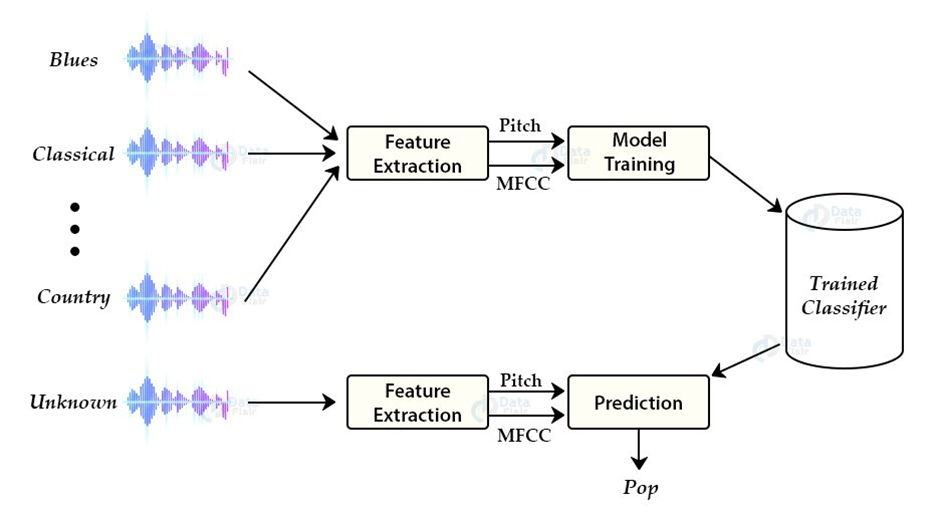

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import librosa
import pickle
import sklearn
import pandas as pd
import IPython.display as ipd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# **Input preprocessing function**

In [3]:
  data = {'chroma_stft_mean':[], 'chroma_stft_var':[], 'rms_mean':[],
        'rms_var':[], 'spectral_centroid_mean':[], 'spectral_centroid_var':[],
        'spectral_bandwidth_mean':[], 'spectral_bandwidth_var':[], 'rolloff_mean':[],
        'rolloff_var':[], 'zero_crossing_rate_mean':[], 'zero_crossing_rate_var':[],
        'harmony_mean':[], 'harmony_var':[], 'perceptr_mean':[], 'perceptr_var':[], 'tempo':[],
        'mfcc1_mean':[], 'mfcc1_var':[], 'mfcc2_mean':[], 'mfcc2_var':[], 'mfcc3_mean':[],
        'mfcc3_var':[], 'mfcc4_mean':[], 'mfcc4_var':[], 'mfcc5_mean':[], 'mfcc5_var':[],
        'mfcc6_mean':[], 'mfcc6_var':[], 'mfcc7_mean':[], 'mfcc7_var':[], 'mfcc8_mean':[],
        'mfcc8_var':[], 'mfcc9_mean':[], 'mfcc9_var':[], 'mfcc10_mean':[], 'mfcc10_var':[],
        'mfcc11_mean':[], 'mfcc11_var':[], 'mfcc12_mean':[], 'mfcc12_var':[], 'mfcc13_mean':[],
        'mfcc13_var':[], 'mfcc14_mean':[], 'mfcc14_var':[], 'mfcc15_mean':[], 'mfcc15_var':[],
        'mfcc16_mean':[], 'mfcc16_var':[], 'mfcc17_mean':[], 'mfcc17_var':[], 'mfcc18_mean':[],
        'mfcc18_var':[], 'mfcc19_mean':[], 'mfcc19_var':[], 'mfcc20_mean':[], 'mfcc20_var':[]}


  test_set = pd.DataFrame(data=data)

  test_set


,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var


In [4]:


def input_preprocessing(y,sr):
  # chroma
  chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)
  chroma_stft_mean =  chromagram.mean()
  chroma_stft_var = chromagram.var()

  # rms
  rms = librosa.feature.rms(y,sr)
  rms_mean = rms.mean()
  rms_var = rms.var()

  # spectral_centroid 
  spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)
  spectral_centroid_mean =  spectral_centroids.mean()
  spectral_centroid_var = spectral_centroids.var()
  
  # spectral_bandwidth
  spectral_bandwidth = librosa.feature.spectral_bandwidth(y,sr=sr)
  spectral_bandwidth_mean =  spectral_bandwidth.mean()
  spectral_bandwidth_var = spectral_bandwidth.var()

  # spectral_rolloff
  spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)
  rolloff_mean = spectral_rolloff.mean()
  rolloff_var = spectral_rolloff.var()

  # zero_crossing_rate
  zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
  zero_crossing_rate_mean = zero_crossing_rate.mean()
  zero_crossing_rate_var = zero_crossing_rate.var()

  # harmony
  y_harm, y_perc = librosa.effects.hpss(y)

  harmony_mean = y_harm.mean()
  harmony_var = y_harm.var()

  # perceptr 
  perceptr_mean = y_perc.mean()
  perceptr_var = y_perc.var()

  # tempo
  tempo, _ = librosa.beat.beat_track(y, sr=sr)

  
  # mfccs
  mfccs_mean_lst = []
  mfccs_var_lst = []

  for j in range(20):
    mfccs = librosa.feature.mfcc(y,sr=sr)[j]
    mfccs_mean_lst.append(mfccs.mean())
    mfccs_var_lst.append(mfccs.var())

  # Make DataFrame

  data = {'chroma_stft_mean':[chroma_stft_mean], 'chroma_stft_var':[chroma_stft_var], 'rms_mean':[rms_mean],
        'rms_var':[rms_var], 'spectral_centroid_mean':[spectral_centroid_mean], 'spectral_centroid_var':[spectral_centroid_var],
        'spectral_bandwidth_mean':[spectral_bandwidth_mean], 'spectral_bandwidth_var':[spectral_bandwidth_var], 'rolloff_mean':[rolloff_mean],
        'rolloff_var':[rolloff_var], 'zero_crossing_rate_mean':[zero_crossing_rate_mean], 'zero_crossing_rate_var':[zero_crossing_rate_var],
        'harmony_mean':[harmony_mean], 'harmony_var':[harmony_var], 'perceptr_mean':[perceptr_mean], 'perceptr_var':[perceptr_var], 'tempo':[tempo],
        'mfcc1_mean':[mfccs_mean_lst[0]], 'mfcc1_var':[mfccs_var_lst[0]], 'mfcc2_mean':[mfccs_mean_lst[1]], 'mfcc2_var':[mfccs_var_lst[1]], 'mfcc3_mean':[mfccs_mean_lst[2]],
        'mfcc3_var':[mfccs_var_lst[2]], 'mfcc4_mean':[mfccs_mean_lst[3]], 'mfcc4_var':[mfccs_var_lst[3]], 'mfcc5_mean':[mfccs_mean_lst[4]], 'mfcc5_var':[mfccs_mean_lst[4]],
        'mfcc6_mean':[mfccs_mean_lst[5]], 'mfcc6_var':[mfccs_mean_lst[5]], 'mfcc7_mean':[mfccs_mean_lst[6]], 'mfcc7_var':[mfccs_mean_lst[6]], 'mfcc8_mean':[mfccs_mean_lst[7]],
        'mfcc8_var':[mfccs_mean_lst[7]], 'mfcc9_mean':[mfccs_mean_lst[8]], 'mfcc9_var':[mfccs_mean_lst[8]], 'mfcc10_mean':[mfccs_mean_lst[9]], 'mfcc10_var':[mfccs_mean_lst[9]],
        'mfcc11_mean':[mfccs_mean_lst[10]], 'mfcc11_var':[mfccs_mean_lst[10]], 'mfcc12_mean':[mfccs_mean_lst[11]], 'mfcc12_var':[mfccs_mean_lst[11]], 'mfcc13_mean':[mfccs_mean_lst[12]],
        'mfcc13_var':[mfccs_mean_lst[12]], 'mfcc14_mean':[mfccs_mean_lst[13]], 'mfcc14_var':[mfccs_mean_lst[13]], 'mfcc15_mean':[mfccs_mean_lst[14]], 'mfcc15_var':[mfccs_mean_lst[14]],
        'mfcc16_mean':[mfccs_mean_lst[15]], 'mfcc16_var':[mfccs_mean_lst[15]], 'mfcc17_mean':[mfccs_mean_lst[16]], 'mfcc17_var':[mfccs_mean_lst[16]], 'mfcc18_mean':[mfccs_mean_lst[17]],
        'mfcc18_var':[mfccs_mean_lst[17]], 'mfcc19_mean':[mfccs_mean_lst[18]], 'mfcc19_var':[mfccs_mean_lst[18]], 'mfcc20_mean':[mfccs_mean_lst[19]], 'mfcc20_var':[mfccs_mean_lst[19]]}

  append_set = pd.DataFrame(data=data)
  
  return append_set


# **Model train**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/features_3_sec.csv')

df.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
X = df.drop(columns=['filename', 'length', 'label'])
y = df['label']

# scaler = sklearn.preprocessing.MinMaxScaler()
# np_scaled = scaler.fit_transform(X)

# X = pd.DataFrame(np_scaled, columns=X.columns)

# X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021,stratify = y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7992, 57) (7992,)
(1998, 57) (1998,)


In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.1,subsample=1,colsample_bytree=0.75,max_depth=6,min_child_weight=1)
xgb.fit(X_train, y_train)

y_preds = xgb.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_preds))

Accuracy: 0.92


In [ ]:
# model save

filename = '/content/drive/MyDrive/classification_model.pkl'
pickle.dump(xgb, open(filename,'wb'))

# **Model load & input testing**

In [5]:
# model load

xgb_load = pickle.load(open('/content/drive/MyDrive/classification_model.pkl','rb'))

In [6]:
# Input generate 

y,sr = librosa.load('/content/drive/MyDrive/test_sample/test_sample_ragge.wav')


print(y)
print(len(y))
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(y) / sr))

[0.         0.         0.         ... 0.02486329 0.0219949  0.02225326]
80097
Sampling rate (Hz): 22050
Audio length (seconds): 3.63


In [7]:
# input audio listen

ipd.Audio(y, rate=sr)

In [8]:

# input preprocessing
test_set = input_preprocessing(y,sr)

# model prediction
y_preds = xgb_load.predict(test_set)

# result 
print(y_preds)

['jazz']


## Music preprocessing


In [9]:
!pip install pydub 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import pydub
from pydub import AudioSegment
import math
import time
import os

In [11]:

src = "/content/drive/MyDrive/test_sample/good_4_u.mp3" 

song = AudioSegment.from_mp3(src)

three_seconds = 3 * 1000

for i in range(int(math.floor(len(song)/three_seconds))):
    slice = song[i*three_seconds:three_seconds*(i+1)]
    slice.export('newSong_{}.wav'.format(i), format="wav")
    y,sr = librosa.load('/content/newSong_{}.wav'.format(i))
    os.remove('/content/newSong_{}.wav'.format(i))
    output_set = input_preprocessing(y,sr)
    test_set=test_set.append(output_set,ignore_index=True)

In [12]:
y,sr = librosa.load(src)


ipd.Audio(y, rate=sr)


Output hidden; open in https://colab.research.google.com to view.

In [13]:
# model prediction
y_preds = xgb_load.predict(test_set)

# result 
print(y_preds)

['jazz' 'blues' 'blues' 'disco' 'hiphop' 'jazz' 'pop' 'disco' 'disco'
 'rock' 'hiphop' 'pop' 'metal' 'jazz' 'disco' 'disco' 'metal' 'metal'
 'disco' 'blues' 'disco' 'disco' 'hiphop' 'disco' 'disco' 'disco' 'disco'
 'disco' 'pop' 'disco' 'disco' 'disco' 'disco' 'disco' 'metal' 'jazz'
 'blues' 'rock' 'rock' 'blues' 'rock' 'pop' 'jazz' 'jazz' 'jazz' 'hiphop'
 'disco' 'jazz' 'jazz' 'disco' 'rock' 'rock' 'disco' 'disco' 'blues'
 'disco' 'disco' 'blues' 'rock' 'jazz']


In [14]:
y_preds = y_preds.tolist()

max(y_preds, key=y_preds.count)

'disco'